In [1]:
import pandas as pd
import numpy as np

#读取数据
data = pd.read_json('trump_tweets_2009~2018.json')

In [2]:
#预览部分数据
data.tail()

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text
33659,2018-01-10 04:23:58,60252,950946293077209088,NaN,False,13822,Twitter for iPhone,".@ICEgov HSI agents and ERO officers, on behal..."
33660,2018-01-10 03:48:26,51951,950937350003183616,NaN,False,11893,Twitter for iPhone,Thank you @GOPLeader Kevin McCarthy! Couldn’t ...
33661,2018-01-10 00:16:57,123413,950884128379035648,NaN,False,24552,Twitter for iPhone,"As I made very clear today, our country needs ..."
33662,2018-01-09 23:59:38,0,950879772644659200,NaN,True,11716,Twitter for iPhone,"RT @Scavino45: “Utilities cutting rates, cite ..."
33663,2018-01-09 23:07:09,82151,950866561153331200,NaN,False,19481,Twitter for iPhone,"Today, it was my great honor to sign a new Exe..."


In [5]:
#平均长度
mean_length = np.mean([len(i) for i in data.text])
print("The lenght's average in tweets: %.2f" % mean_length)

The lenght's average in tweets: 112.30


In [9]:
#最高赞与最高转发
max_fav_num = data.favorite_count.max()
max_fav_text = data.text[data.favorite_count == max_fav_num]

max_ret_num = data.retweet_count.max()
max_ret_text = data.text[data.retweet_count == max_ret_num]

print('The tweets with more like:\n{}'.format(max_fav_text.values))
print('Numbers of like: {}'.format(max_fav_num))
print()
print('The tweets with more reweet:\n{}'.format(max_ret_text.values))
print('Numbers of reweet: {}'.format(max_ret_num))

The tweets with more like:
[ 'Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before']
Numbers of like: 633253

The tweets with more reweet:
['#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg']
Numbers of reweet: 369530


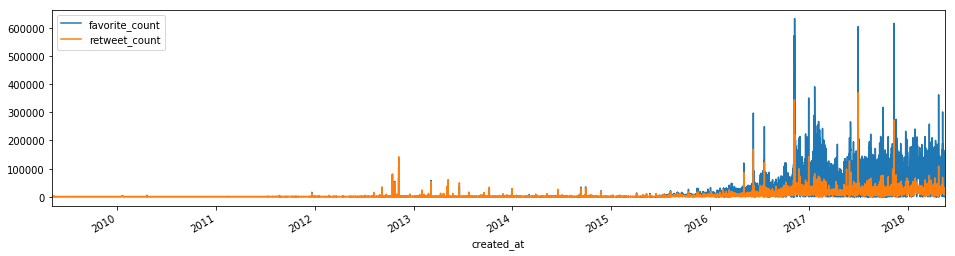

In [15]:
#点赞量与转发量分析
%matplotlib inline

fav_tweets = pd.Series(data = data.favorite_count.values,index = data.created_at)
ret_tweets = pd.Series(data = data.retweet_count.values,index = data.created_at)

fav_tweets.plot(figsize=(16,4), label="favorite_count", legend=True)
ret_tweets.plot(figsize=(16,4), label="retweet_count", legend=True)